## 3-1 Accuracy(정확도)
**이진분류에서 정확도의 위험성**

In [79]:
import sklearn
import warnings
warnings.filterwarnings(action='ignore')
print(sklearn.__version__)

1.0.2


### 타이타닉에서 여성만 살아남는 잘못된 예측 -> 정확도는 높다

#### MyDummyClassifier : 여자만 생존한다고 예측하는 분류기

In [83]:
np.zeros((10,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [84]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1(남)이면 0(죽음), 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) ) # X.shape[0]행, 1열 형태. 모두 0인 데이터
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1: # 남자면 죽었다고 예측
                pred[i] = 0
            else: # 여자면 살았다고 예측
                pred[i] = 1
        return pred

In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

#### MyDummyClassifier 정확도 : 83%

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터 재로딩, 가공, 학습/테스트 데이터 분할
titanic_df = pd.read_csv('../2장/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                   test_size=0.2, random_state=11)
# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)
mypred = myclf.predict(X_test)
print(f"Dummy Classifier의 정확도는: {accuracy_score(y_test,mypred):.2%}")

Dummy Classifier의 정확도는: 83.24%


### MNIST digits(숫자 손글씨) -> 7인지 아닌지 이진분류예측

#### MyFakeClassifier 모든 예측을 0으로 함

In [92]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [105]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 예측
    def predict(self, X):
        return np.zeros( (len(X),1) ,dtype=int)
    
# 사이킷런의 내장 데이터셋 MNIST 로딩
digits = load_digits()

print(f"digits 데이터셋\n{digits.data}")
print(f">>> digits 데이터셋 shape: {digits.data.shape}")
print(f"\ndigits target 데이터셋\n{digits.target}")
print(f">>> digits target shape: {digits.target.shape}")

digits 데이터셋
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
>>> digits 데이터셋 shape: (1797, 64)

digits target 데이터셋
[0 1 2 ... 8 9 8]
>>> digits target shape: (1797,)


In [109]:
## target이 7인 경우만 True -> 1
(digits.target == 7).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

#### target 데이터셋을 7이면 1, 나머지는 0으로 변환

In [110]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [133]:
# 불균형한 레이블 데이터 분포도 확인
print(f"레이블 테스트 데이터 셋 shape : {y_test.shape}")
print(f"테스트 데이터 셋 레이블 분포도(0 과 1)\n{pd.Series(y_test).value_counts()}")

## Fake Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test) # 모두 0으로 예측. 450행, 1열의 모두 0인 2차원 행렬
print(f"fakepred의 shape: {fakepred.shape}")
print(f"모든 예측을 0으로 하여도 정확도는 {accuracy_score(y_test,fakepred):.1%}")
answer=y_test.copy()

레이블 테스트 데이터 셋 shape : (450,)
테스트 데이터 셋 레이블 분포도(0 과 1)
0    405
1     45
dtype: int64
fakepred의 shape: (450, 1)
모든 예측을 0으로 하여도 정확도는 90.0%


## Confusion Matrix

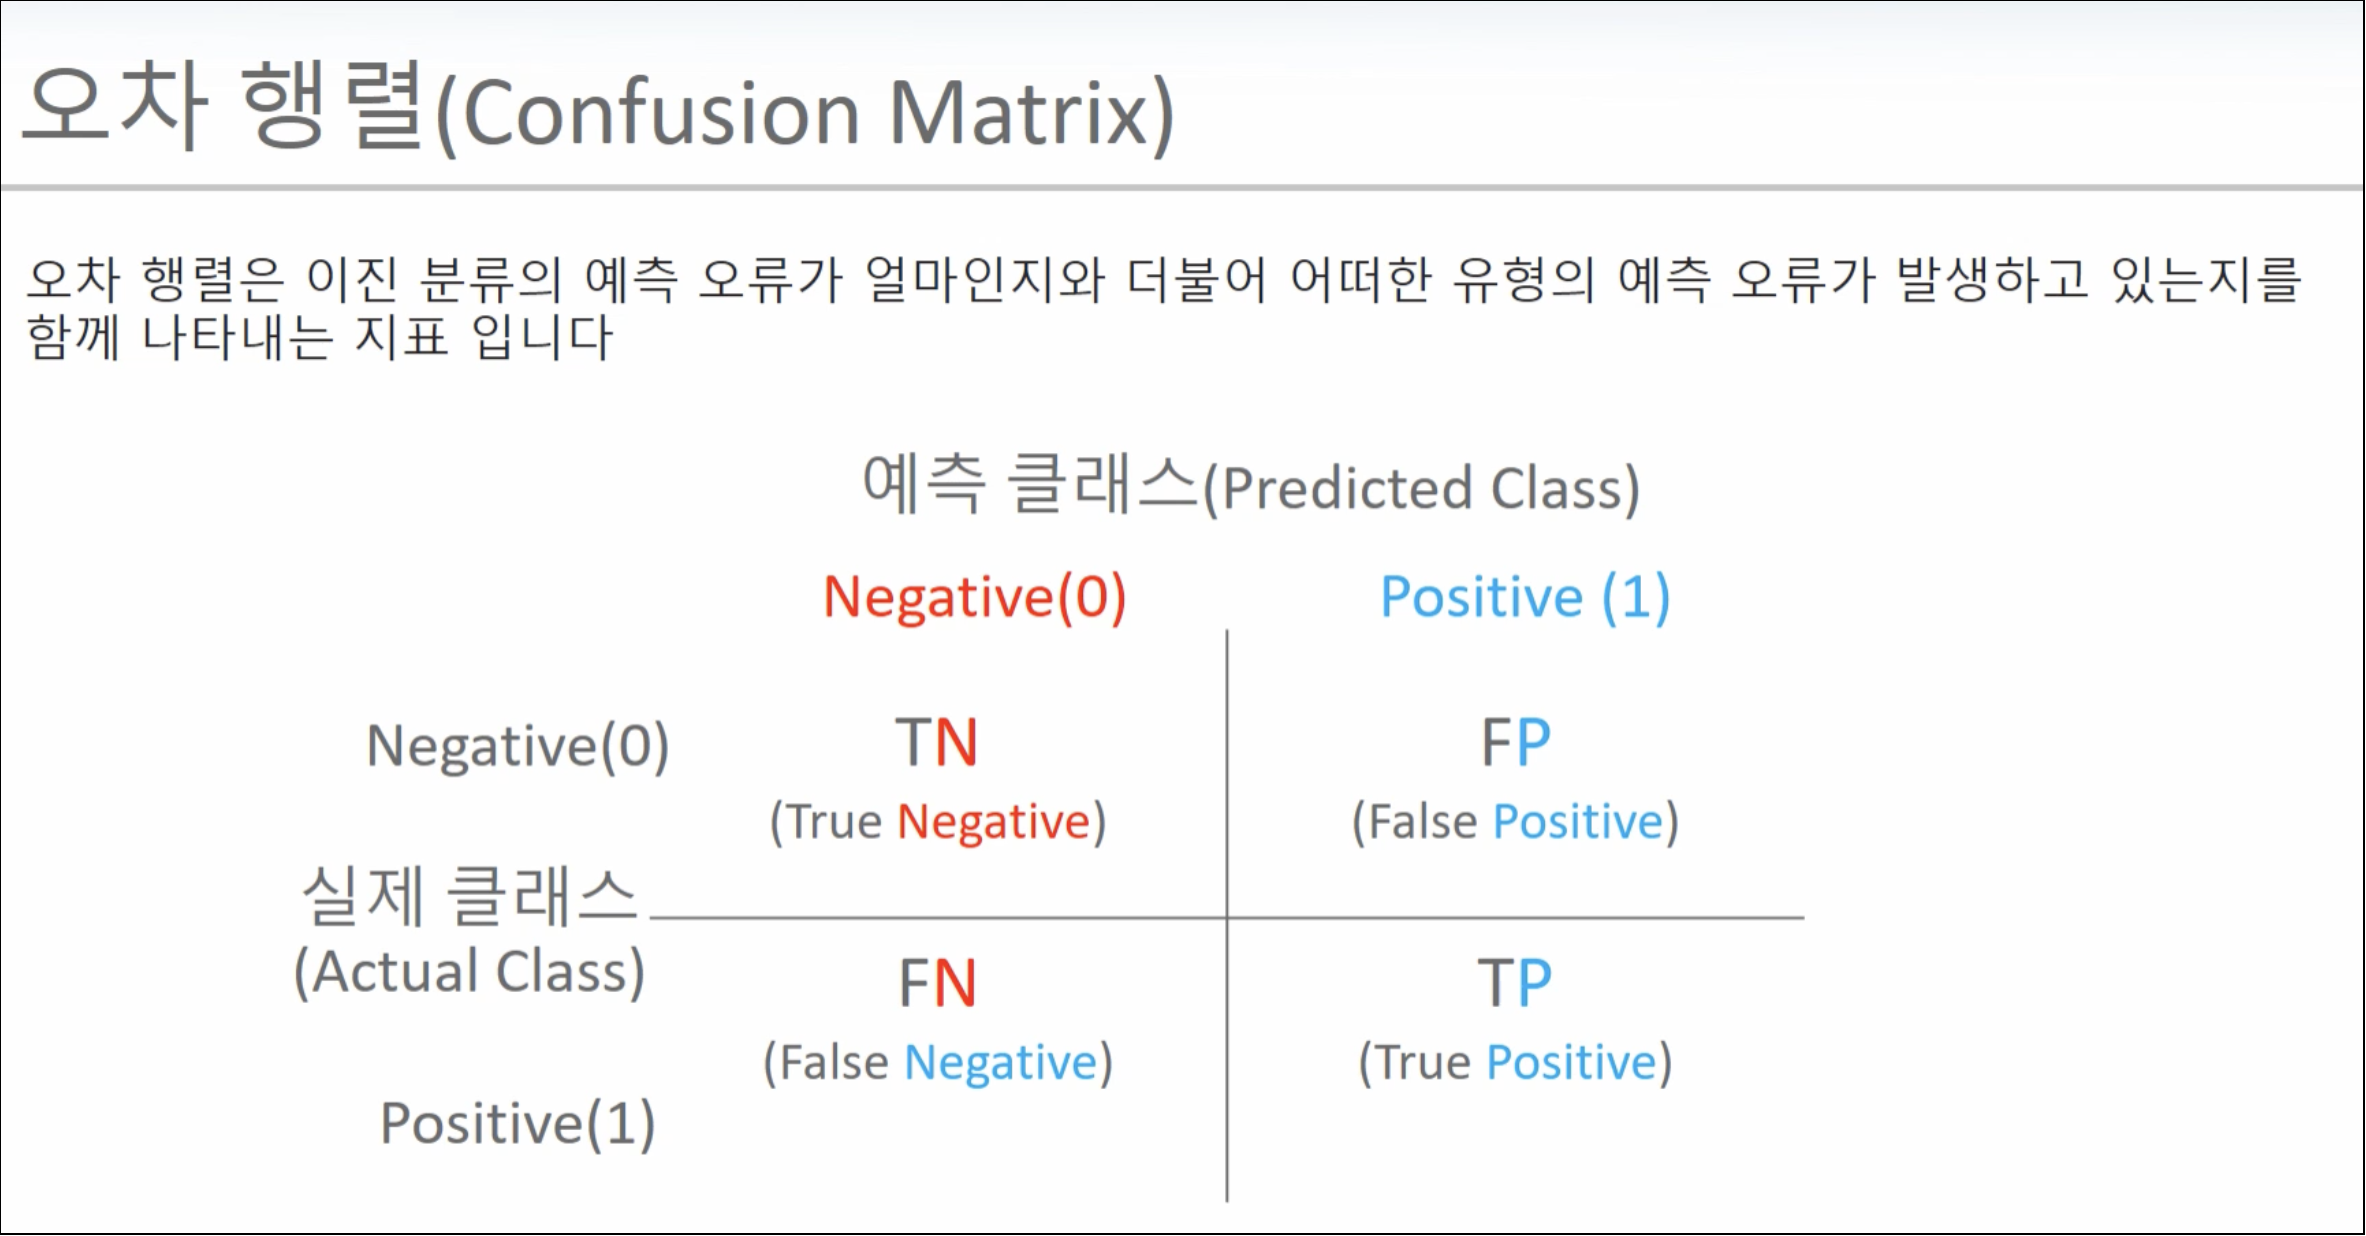

In [132]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(answer, fakepred) # answer대비, fakepred의 TN, TP, FN, FP 행렬 출력

array([[405,   0],
       [ 45,   0]])

## 정밀도(Precision) 과 재현율(Recall)
- 정밀도: 예측을 Positive로 한 대상 중에 실제 값이 Positive인 비율.<br>
    표 기준으로 예측 Postive의 **세로**. **precision_score 함수**
- 재현율: 실제 값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치하는 비율.<br>
    표 기준으로 실제 Positve의 **가로**. **recall_score 함수**

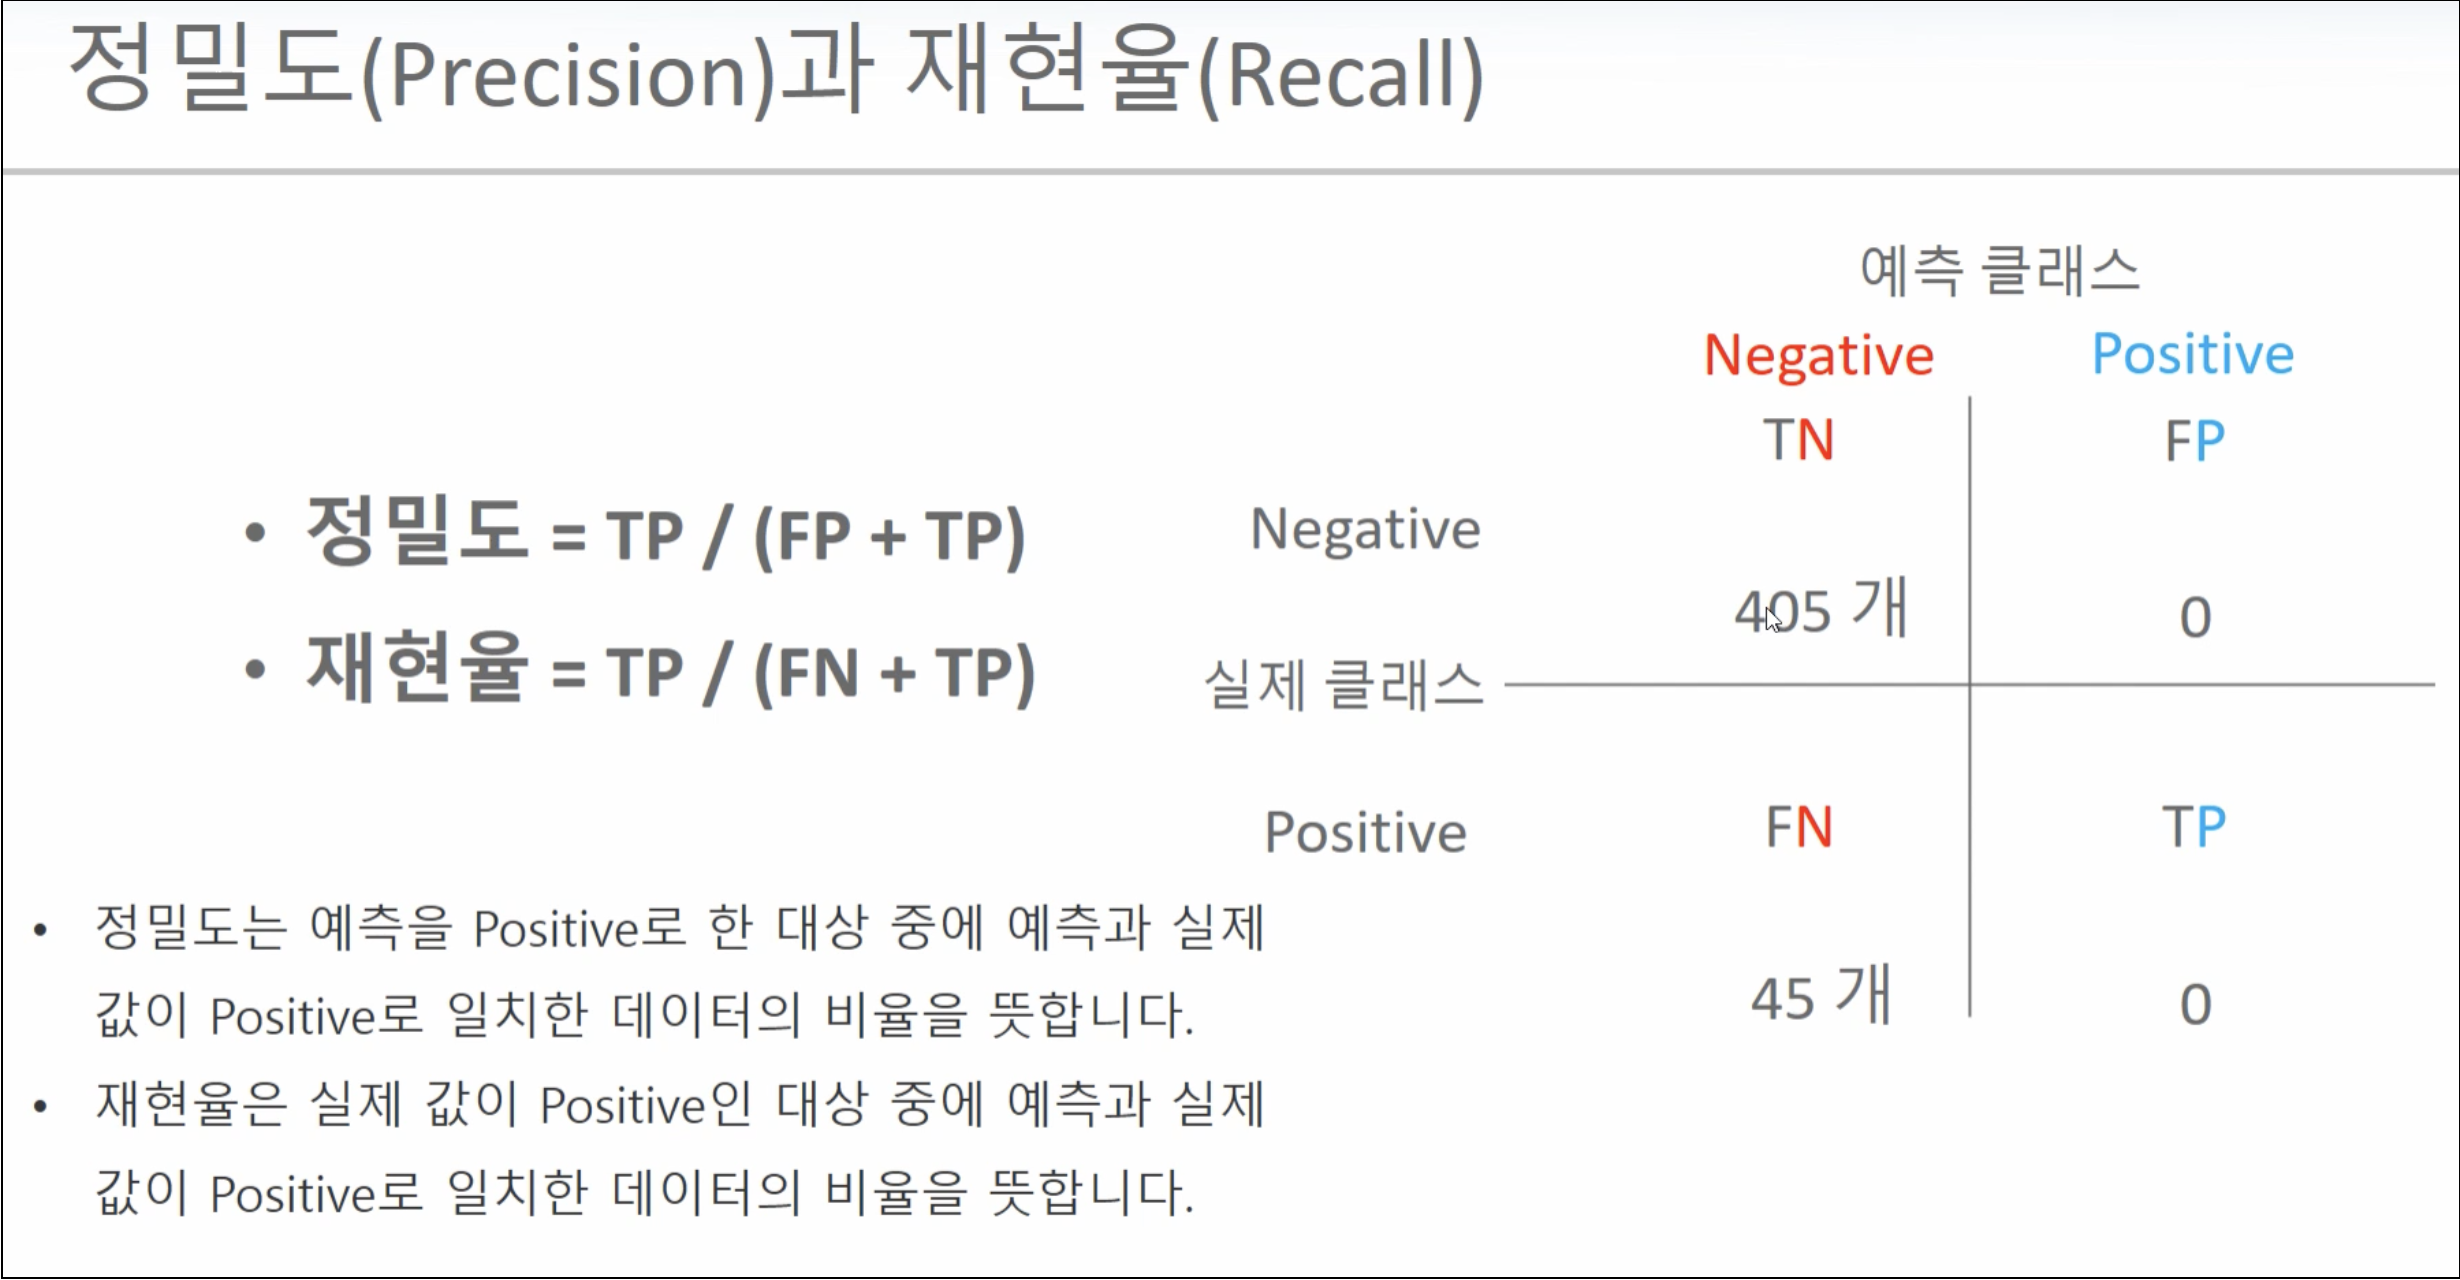

**MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정**

In [136]:
fakepred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f"정밀도: {precision_score(answer, fakepred)}")
print(f"재현율: {recall_score(answer, fakepred)}")

정밀도: 0.0
재현율: 0.0


#### **오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성**

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# 오차행렬, 정확도, 정밀도, 재현율 출력함수
def get_clf_eval(y_test, pred):
    conf_matrix = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(f"오차 행렬\n{conf_matrix}")
    print(f"정확도: {acc:.2%}, 정밀도: {prec:.2%}, 재현율 {recall:.2%}")

In [162]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

## 타이타닉 데이터 불러와서 train_test나누고, LogisticRegression하기
t_df = pd.read_csv('../2장/titanic/train.csv')
y_t_df = t_df.Survived
x_t_df = t_df.drop('Survived',axis=1)
x_t_df = transform_features(x_t_df)
X_train, X_test, y_train, y_test = train_test_split(x_t_df, y_t_df,
                                                   test_size=0.2, random_state=11)
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
## y_test와 pred로 한번에 결과 보여주는 함수 호출
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 86.59%, 정밀도: 82.46%, 재현율 77.05%


1. 정밀도가 중요한 경우 : 실제 Negative 데이터를 Positive로 잘못 예측하는게 큰일인 경우 -> **즉, FP가 큰일인 경우**
- ex) 스팸메일 : 실제 Negative(정상메일)을 스팸메일(Positve)로 잘못 예측하면, 이게 중요한 메일일 때, 그걸 놓쳐 큰일날 수 있다.
2. 재현율이 중요한 경우 : 실제 Positive 데이터를 Negative로 잘못 예측하는게 큰일인 경우 -> **즉, FN이 큰일인 경우**
- ex) 암진단 : 실제 암(Positive)를 정상(Negative)으로 잘못 예측하면, 환자가 암인데 모르고 지나가 큰일날 수 있다.

### Precision/Recall Trade-off

결정 임계값(Threshold)를 조정해 정밀도 또는 재현율 수치를 높일 수 있다.<br>
정밀도와 재현율은 상호보완적인 지표이기 때문에, 어느 한쪽을 높이면 다른 한쪽이 떨어지기 쉽다. 이걸 **Precision/Recall Trade-off** 라고 한다.

- 임계값: Classifier가 분류할 때, 확률을 기반으로 Positive, Negative를 예측한다. 이 때, Positive로 할지, Negative로 할지 기준이 되는값이 임계값이다.
>- 예를들어, 암일 확률이 0.45이고, 암이 아닐 확률이 0.55일 때, 임계값이 0.5이면 Positive일 확률이 0.45이기 때문에 임계값을 넘지 못해, 암이 아니라고 분류한다. 근데 임계값이 0.4라면, 암일 확률 0.45가 임계값을 넘었기 때문에 암이라고 분류하게된다.<br>
즉, 임계값이 낮아질 수록 Positive가 많아지고, 이는 Positive로 예측할 확률이 높아진다는 뜻이고, 재현율이 증가한다는 뜻이다.

<img src="https://blog.kakaocdn.net/dn/eeCzHI/btrBjJPUPKg/m2H6SeTBKU187dC9PT8oH1/img.png" width="1500">

#### **predict_proba( ) 메소드 확인**
: 라벨 순서대로 확률값을 출력. 이진 분류에선 0일 확률과 1일 확률을 출력한다.

In [209]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
# pred_proba 결과 출력
print(f"pred_proba()결과 Shape: {pred_proba.shape}")
print(f"pred_proba array 앞에 3개만 출력\n {pred_proba[:3]}\n")

result = np.array([f"-> {i}" for i in pred])# 확률 -> 예측
pred_proba_result = [f"{np.round(i,2)} -> {k}" for i,k in zip(pred_proba,pred)]
print(f"3개 array에 대해, 더 큰 확률 예측 시각화\n{pred_proba_result[:3]}")

pred_proba()결과 Shape: (179, 2)
pred_proba array 앞에 3개만 출력
 [[0.44935226 0.55064774]
 [0.86335512 0.13664488]
 [0.86429644 0.13570356]]

3개 array에 대해, 더 큰 확률 예측 시각화
['[0.45 0.55] -> 1', '[0.86 0.14] -> 0', '[0.86 0.14] -> 0']


#### **Binarizer 활용**
: 기준값보다 작거나 같으면 0을, 크면 1을 반환<br>
**Binarizer는 이진분류에서 threshold 적용해주는 Estimator**

In [214]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 1.1을 기준으로 이하이면 0, 초과면 1 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


#### Binarizer를 이용한 임계값 바꿔가며 출력하기

**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

In [215]:
from sklearn.preprocessing import Binarizer

In [222]:
# Binarizer의 threshold 설정
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출 -> Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # 1에 대한 확률
custom_pred = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 86.59%, 정밀도: 82.46%, 재현율 77.05%


**분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환**

In [223]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉, 분류 결정 임계값 0.5 -> 0.4
custom_threshold = 0.4
custom_pred = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_pred)

오차 행렬
[[97 21]
 [11 50]]
정확도: 82.12%, 정밀도: 70.42%, 재현율 81.97%


**여러개의 분류 결정 임곗값을 변경하면서  Binarizer를 이용하여 예측값 변환**

In [224]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # threshold list객체내의 값을 차례로 itertation하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        custom_pred = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_c1)
        get_clf_eval(y_test, custom_pred)

In [225]:
get_eval_by_threshold(y_test, pred_proba_1, thresholds)

오차 행렬
[[97 21]
 [11 50]]
정확도: 82.12%, 정밀도: 70.42%, 재현율 81.97%
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 85.47%, 정밀도: 78.69%, 재현율 78.69%
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 86.59%, 정밀도: 82.46%, 재현율 77.05%
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 87.15%, 정밀도: 86.54%, 재현율 73.77%
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 87.71%, 정밀도: 89.80%, 재현율 72.13%


#### precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출
precision_recall_curve함수 : 정밀도, 재현율, 임계값의 리스트를 반환

    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )

In [250]:
from sklearn.metrics import precision_recall_curve
# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_cls1 = lr_clf.predict_proba(X_test)[:,1]
print(f"pred_proba_cls1 : {pred_proba_cls1[:5]}...")

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_cls1)
# Shape 출력
print(f"thresholds 배열 Shape: {thresholds.shape}")
print(f"precisions 배열 Shape: {precisions.shape}")
print(f"recalls 배열 Shape: {recalls.shape}\n")
# 앞에 6개 출력
print(f"thresholds 배열 head : {thresholds[:6]}")
print(f"precisions 배열 head: {precisions[:6]}")
print(f"recalls 배열 head  : {recalls[:6]}\n")

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15스템으로 추출
thr_idx = np.arange(0, thresholds.shape[0], 15)
print(f"thresholds에서 추출한 10개 인덱스: {thr_idx}")
# thr_idx기준 thresholds, precisions, recalls 배열 출력
print(f"thr_idx기준 thresholds 값: {np.round(thresholds[thr_idx],2)}")
print(f"thr_idx기준 precisions 값: {np.round(precisions[thr_idx],2)}")
print(f"thr_idx기준 recalls.  값 : {np.round(recalls[thr_idx],2)}")

pred_proba_cls1 : [0.55064774 0.13664488 0.13570356 0.1503148  0.1765659 ]...
thresholds 배열 Shape: (147,)
precisions 배열 Shape: (148,)
recalls 배열 Shape: (148,)

thresholds 배열 head : [0.11573102 0.11636722 0.11819212 0.12102774 0.12349479 0.12350957]
precisions 배열 head: [0.37888199 0.375      0.37735849 0.37974684 0.38216561 0.37820513]
recalls 배열 head  : [1.         0.98360656 0.98360656 0.98360656 0.98360656 0.96721311]

thresholds에서 추출한 10개 인덱스: [  0  15  30  45  60  75  90 105 120 135]
thr_idx기준 thresholds 값: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
thr_idx기준 precisions 값: [0.38 0.42 0.45 0.52 0.62 0.68 0.8  0.93 0.96 1.  ]
thr_idx기준 recalls.  값 : [1.   0.97 0.9  0.9  0.9  0.82 0.77 0.66 0.44 0.21]


**임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림**

X축 start: 0.0743544288711632, end:0.9846393831290342, ticks: [0.07 0.17 0.27 0.37 0.47 0.57 0.67 0.77 0.87 0.97]


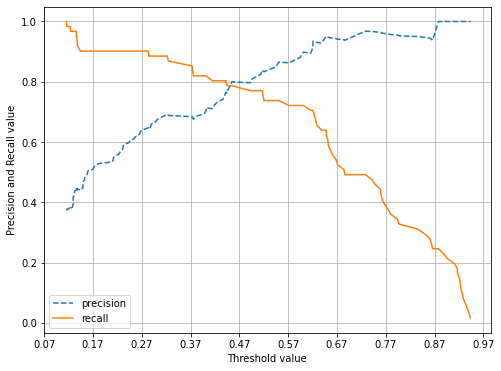

In [259]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 가각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    # threshold는 147인데, precisions, recall은 148이라 147 사용
    threshold_boundary = thresholds.shape[0] # 147
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    print(f"X축 start: {start}, end:{end}, ticks: {np.round(np.arange(start, end, 0.1),2)}")
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid(); plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

### 3.4 F1 Score

In [265]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f"F1 스코어 : {f1:.4f}")

F1 스코어 : 0.7966


In [277]:
def get_clf_eval(y_test, pred):
    conf = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print(f"오차 행렬\n{conf}")
    # F1 print 추가
    print(f"정화도: {acc:.2%}, 정밀도: {prec:.2%}, 재현율: {recall:.2%}, F1: {f1:.2%}\n")

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
print(f"pred_proba head(3)\n{pred_proba[:3]}")
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

pred_proba head(3)
[[0.44935226 0.55064774]
 [0.86335512 0.13664488]
 [0.86429644 0.13570356]]
오차 행렬
[[97 21]
 [11 50]]
정화도: 82.12%, 정밀도: 70.42%, 재현율: 81.97%, F1: 75.76%

오차 행렬
[[105  13]
 [ 13  48]]
정화도: 85.47%, 정밀도: 78.69%, 재현율: 78.69%, F1: 78.69%

오차 행렬
[[108  10]
 [ 14  47]]
정화도: 86.59%, 정밀도: 82.46%, 재현율: 77.05%, F1: 79.66%

오차 행렬
[[111   7]
 [ 16  45]]
정화도: 87.15%, 정밀도: 86.54%, 재현율: 73.77%, F1: 79.65%

오차 행렬
[[113   5]
 [ 17  44]]
정화도: 87.71%, 정밀도: 89.80%, 재현율: 72.13%, F1: 80.00%



## 3-5 ROC Curve와 AUC

In [278]:
from sklearn.metrics import roc_curve

In [304]:
# 레이블 값이 1일때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
print(f"pred_proba_class1 head(3)\n{pred_proba_class1[:3]}\n")

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
print(f"fprs shp: {fprs.shape}, tprs shp: {tprs.shape}, thrsholds shp: {thresholds.shape}")
# thresholds에서 5step으로 인덱스 추출
# 주의사항! : thresholds[0]은 max(에측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1 부터 시작
thr_idx = np.arange(1,thresholds.shape[0], 5)
print(f"샘플 추출을 위한 thresholds index: {thr_idx}\n")

# thr_idx에 따른 thresholds, FRP, TRP 값
print(f"thr_idx에 대한 thresholds의 값: {np.round(thresholds[thr_idx],2)}")
print(f"thr_idx에 대한 임계값별 FPR 값: {np.round(fprs[thr_idx],2)}")
print(f"thr_idx에 대한 임계값별 TPR 값: {np.round(tprs[thr_idx],2)}")

pred_proba_class1 head(3)
[0.55064774 0.13664488 0.13570356]

fprs shp: (48,), tprs shp: (48,), thrsholds shp: (48,)
샘플 추출을 위한 thresholds index: [ 1  6 11 16 21 26 31 36 41 46]

thr_idx에 대한 thresholds의 값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
thr_idx에 대한 임계값별 FPR 값: [0.   0.01 0.03 0.08 0.13 0.25 0.58 0.61 0.75 0.85]
thr_idx에 대한 임계값별 TPR 값: [0.02 0.49 0.7  0.74 0.8  0.89 0.9  0.95 0.97 1.  ]


fprs shp: (48,), tprs shp: (48,), thrsholds shp: (48,)


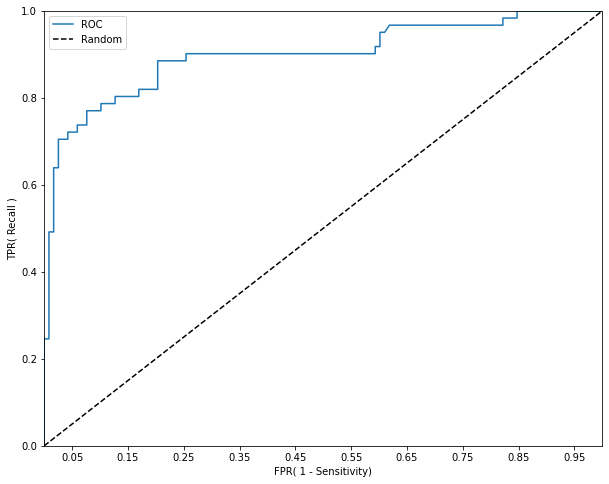

In [305]:
def roc_curve_plot(y_test, pred_proba_c1):
    # thresholds에 따른 FRP, TPR 받기
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    print(f"fprs shp: {fprs.shape}, tprs shp: {tprs.shape}, thrsholds shp: {thresholds.shape}")
    
    plt.figure(figsize=(10,8))
    # ROC Curve를 plot 곡선으로 그리기
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선 그리기
    plt.plot([0,1], [0,1], 'k--', label='Random') # 대각선은 랜덤을 의미
    
    # FRP X 축의 Scale을 0.1 단위로 변경. X,Y 축 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity)'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [315]:
from sklearn.metrics import roc_auc_score, roc_curve

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)

print(f"Roc Auc Score: {roc_score:.4f}")

Roc Auc Score: 0.8987


In [324]:
def get_clf_eval(y_test, pred, pred_proba):
    conf = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_score = roc_auc_score(y_test, pred_proba)
    print(f"오차 행렬\n{conf}")
    # ROC-AUC 출력 추가
    print(f"정화도: {acc:.2%}, 정밀도: {prec:.2%}, 재현율: {recall:.2%}, F1: {f1:.2%}\n, AUC: {roc_score}")

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[108  10]
 [ 14  47]]
정화도: 86.59%, 정밀도: 82.46%, 재현율: 77.05%, F1: 79.66%
, AUC: 0.8986524034454015
